# Project - Customer Segmentation of Mall Customers

### Problem Statement - Form the clusters according to customers gender,age ,annual income and spending score.

#### Importing important libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans,DBSCAN, Birch, AffinityPropagation, AgglomerativeClustering, OPTICS, MeanShift
from sklearn.mixture import GaussianMixture

In [3]:
import warnings
warnings.filterwarnings("ignore")

#### Reading data

In [4]:
df = pd.read_csv('Mall_Customers.csv')

In [5]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<AxesSubplot:>

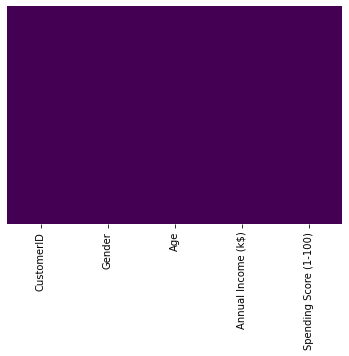

In [7]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)

No missing values are found

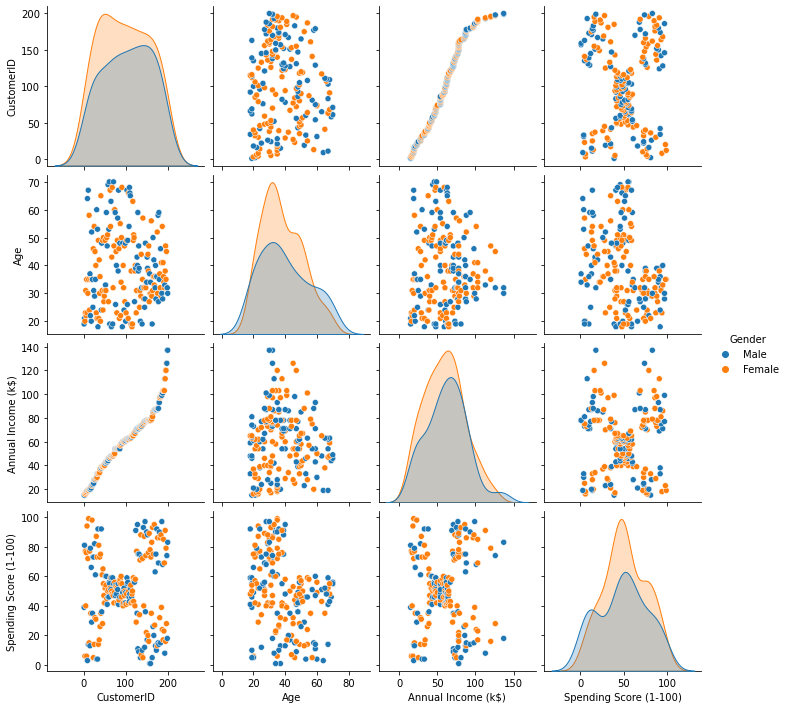

In [8]:
sns.pairplot(df,hue='Gender')

<AxesSubplot:xlabel='Gender', ylabel='count'>

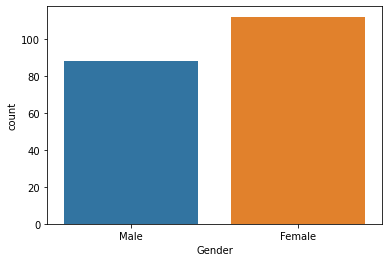

In [9]:
sns.countplot(df['Gender'])

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [10]:
num_col = [i for i in df.columns if df[i].dtype != 'O']
num_col.remove('CustomerID')
num_col

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Checking Distribution for Age


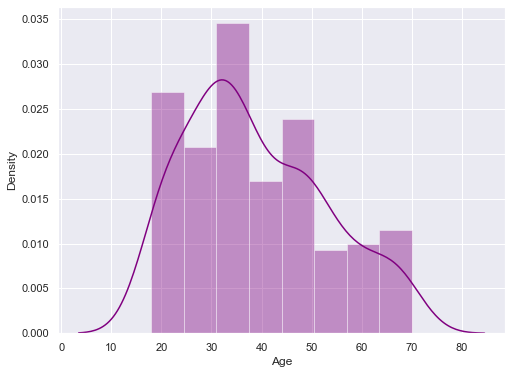

Mean of Age Age: ,38.85
Median of Age is: ,36.0
Mode of Age Age is: ,0    32
dtype: int64
**************************************************
Checking Distribution for Annual Income (k$)


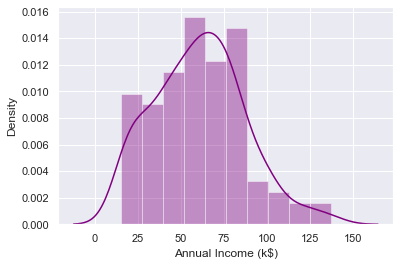

Mean of Age Annual Income (k$): ,60.56
Median of Annual Income (k$) is: ,61.5
Mode of Age Annual Income (k$) is: ,0    54
1    78
dtype: int64
**************************************************
Checking Distribution for Spending Score (1-100)


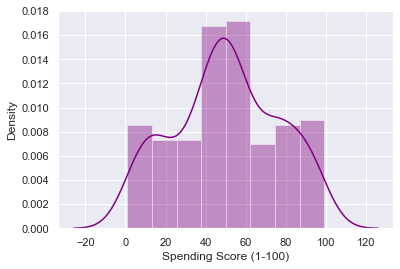

Mean of Age Spending Score (1-100): ,50.2
Median of Spending Score (1-100) is: ,50.0
Mode of Age Spending Score (1-100) is: ,0    42
dtype: int64
**************************************************


In [11]:
sns.set()
plt.figure(figsize=(8,6))
for i in num_col:
    print(f'Checking Distribution for {i}')
    sns.distplot(df[i],color='purple')
    plt.show()
    print(f'Mean of Age {i}: ,{df[i].mean()}')
    print(f'Median of {i} is: ,{df[i].median()}')
    print(f'Mode of Age {i} is: ,{df[i].mode()}')
    print('*'*50)

For age distribution skewed to the right, i.e more data fall into greater than mode value.

Here  Mean > Median > Mode

The distribution of Annual income and spending score is symmetrical

##### Most of the People earn 40k to 80k annually. Very few people earn more than 100k. And the least annual income is 20k Most mall visitors are of age 20 to 35 years old. Senior citizens visits less to the mall.

<AxesSubplot:>

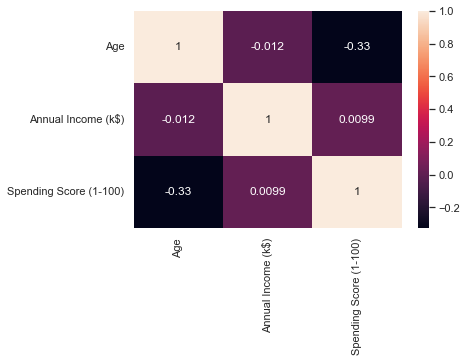

In [12]:
sns.heatmap(df.drop(['CustomerID','Gender'],axis=1).corr(),annot=True)

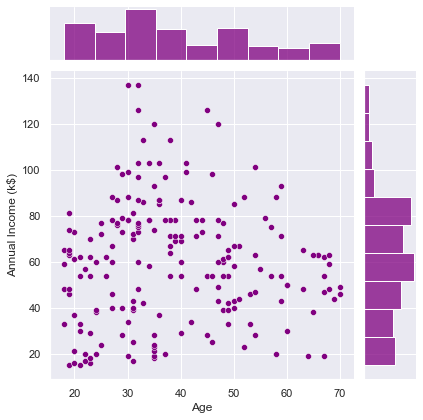

In [13]:
sns.jointplot(data=df,x='Age',y='Annual Income (k$)',color='purple')

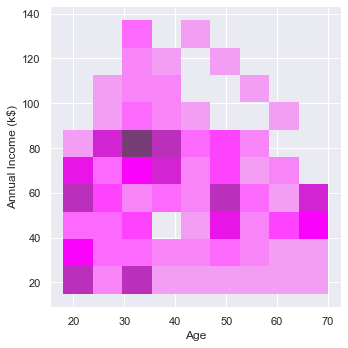

In [14]:
sns.displot(data=df,x='Age',y='Annual Income (k$)',color='purple')

##### Most customers visiting Mall have Annual Income of 50k to 80k.

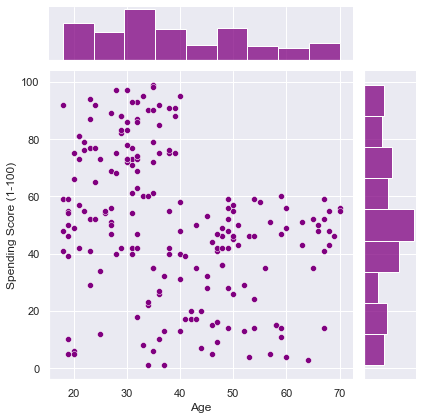

In [15]:
sns.jointplot(data=df,x='Age',y='Spending Score (1-100)',color='purple')

As the age increases spending score decreases. From age 20 to 40 have high spending score then, from age 40 to 70 low spending score

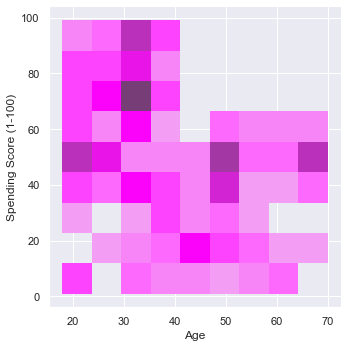

In [16]:
sns.displot(data=df,x='Age',y='Spending Score (1-100)',color='purple')

##### The Age of Customer from 20 to 40 have high Spending Score.

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

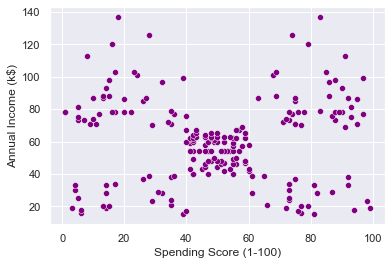

In [17]:
#plot relationship between Annual Income and Spending score
sns.scatterplot(data=df,x='Spending Score (1-100)',y='Annual Income (k$)',color='purple')

##### Customers having Annual Income range 20k to 40k and 80k to 100k have higher Spending Score. And a big chunk of customers are around ~50k income with ~50 Spending Score

No handles with labels found to put in legend.


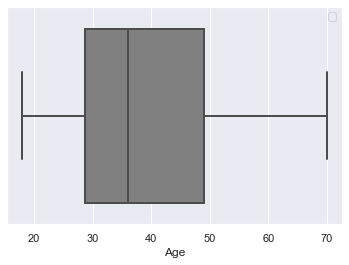

No handles with labels found to put in legend.


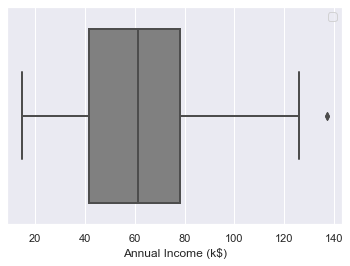

No handles with labels found to put in legend.


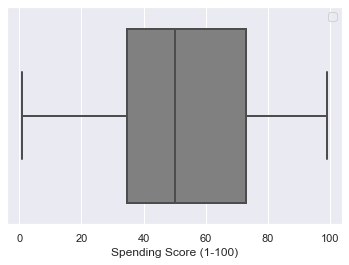

In [18]:
def boxplot(col):
    sns.boxplot(df[col],color='grey',orient='h',linewidth='2')
    plt.xlabel(col)
    plt.legend()
    plt.show()
    
for x in num_col:
    boxplot(x)

In [19]:
Q1 = np.quantile(df['Annual Income (k$)'],0.25)
Q3 = np.quantile(df['Annual Income (k$)'],0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5*IQR
print(upper_limit)

132.75


In [20]:
df[df['Annual Income (k$)']>132.75]

CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
198         199   Male   32                 137                      18
199         200   Male   30                 137                      83

##### There are only two outliers in annual income, which we can ignore

<AxesSubplot:xlabel='Gender', ylabel='Age'>

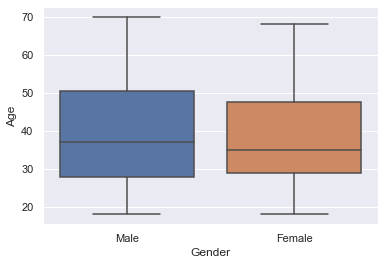

In [21]:
sns.boxplot(df['Gender'],df['Age'])

##### Spending score is higher than median for Female than Male

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

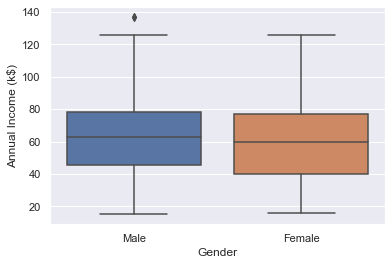

In [22]:
sns.boxplot(df['Gender'],df['Annual Income (k$)'])

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

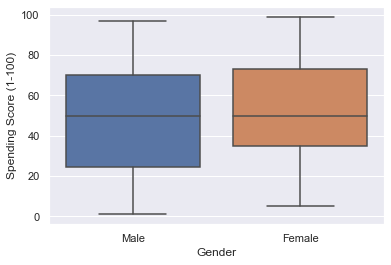

In [23]:
sns.boxplot(df['Gender'],df['Spending Score (1-100)'])

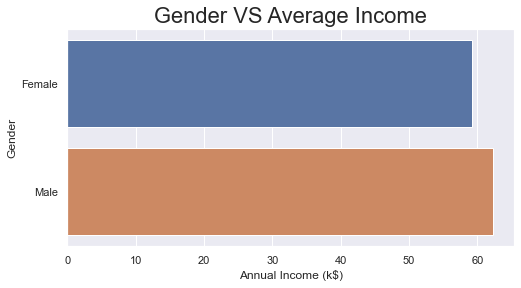

In [24]:
gender_income = df.groupby('Gender')['Annual Income (k$)'].agg('mean').reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data= gender_income, y='Gender', x='Annual Income (k$)')
plt.title("Gender VS Average Income", fontsize = 22)
plt.show()

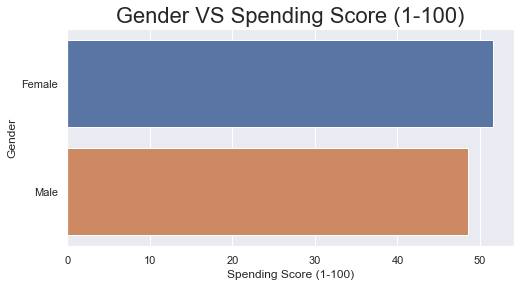

In [25]:
gender_spending_score = df.groupby('Gender')['Spending Score (1-100)'].agg('mean').reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data= gender_spending_score, y='Gender', x='Spending Score (1-100)')
plt.title("Gender VS Spending Score (1-100)", fontsize = 22)
plt.show()

##### Average income for Male is high but average spending for Female is High

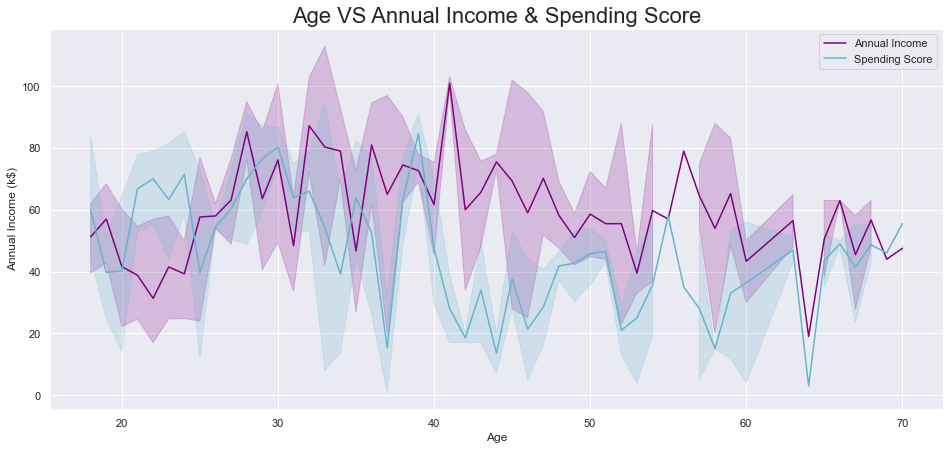

In [26]:
plt.figure(figsize=(16, 7))
x = df['Age']
y = df['Annual Income (k$)']
z = df['Spending Score (1-100)']

sns.lineplot(x, y, color = 'purple', label="Annual Income")
sns.lineplot(x, z, color= 'c', label="Spending Score")
plt.title("Age VS Annual Income & Spending Score", fontsize= 22)
plt.legend()
plt.show()

# Clustering

In [27]:
df.head(2)

CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1   Male   19                  15                      39
1           2   Male   21                  15                      81

In [28]:
X = df.iloc[:,2:]
X.head()

Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40

#### Check data is clusterable or not

#### Hopkins Statistics

In [29]:
# Function to calculate Hopkins score
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [30]:
hopkins(X)

0.7322031921716118

##### Hopkins score is greater than 0.5 hence,clusters can form

### K-Means Clustering

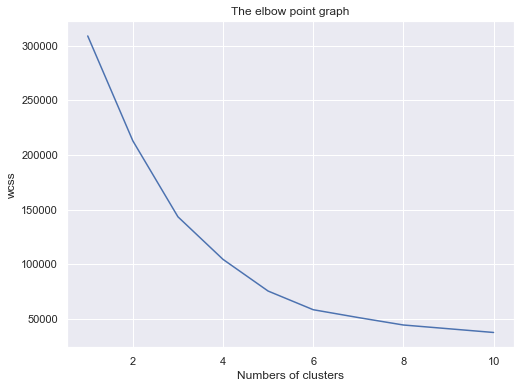

In [31]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)
    
sns.set()
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss)
plt.title('The elbow point graph')
plt.xlabel('Numbers of clusters')
plt.ylabel('wcss')
plt.show()

##### From the elbow curve it is clear that the optimum number of clusters i.e., n_clusters is 5.

In [32]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)

y = kmeans.fit_predict(X)

print(y)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [33]:
clusters = kmeans.labels_

In [34]:
X.head()

Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40

In [35]:
X.shape

(200, 3)

In [36]:
import plotly.figure_factory as ff
import numpy as np
ff.create_dendrogram(X)

For n_clusters = 2 The average silhouette_score is : 0.293166070535953
For n_clusters = 3 The average silhouette_score is : 0.3839349967742105
For n_clusters = 4 The average silhouette_score is : 0.40546302077733304
For n_clusters = 5 The average silhouette_score is : 0.44428597560893024
For n_clusters = 6 The average silhouette_score is : 0.4523443947724053
For n_clusters = 7 The average silhouette_score is : 0.4398198217929885
For n_clusters = 8 The average silhouette_score is : 0.4352315435135759
For n_clusters = 9 The average silhouette_score is : 0.4083885402537527
For n_clusters = 10 The average silhouette_score is : 0.38328343620113586
For n_clusters = 11 The average silhouette_score is : 0.36605492965523806


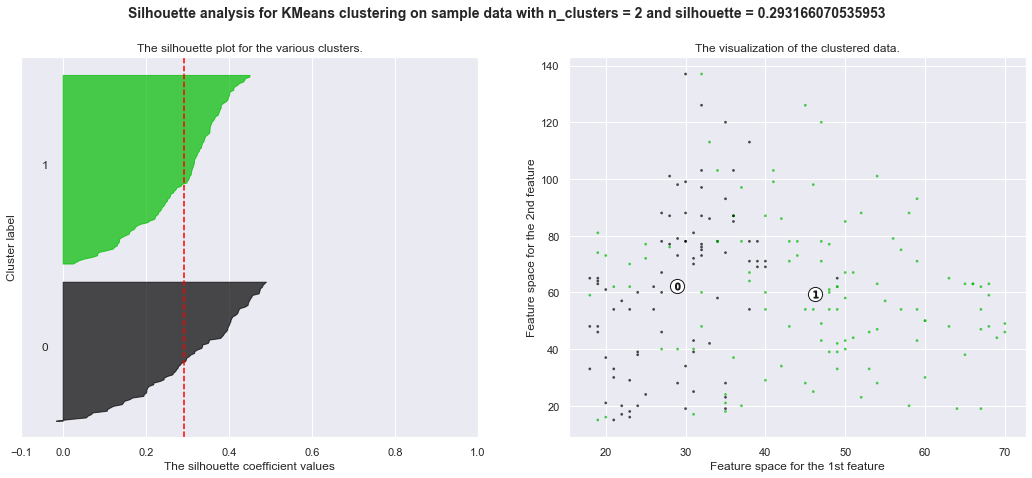

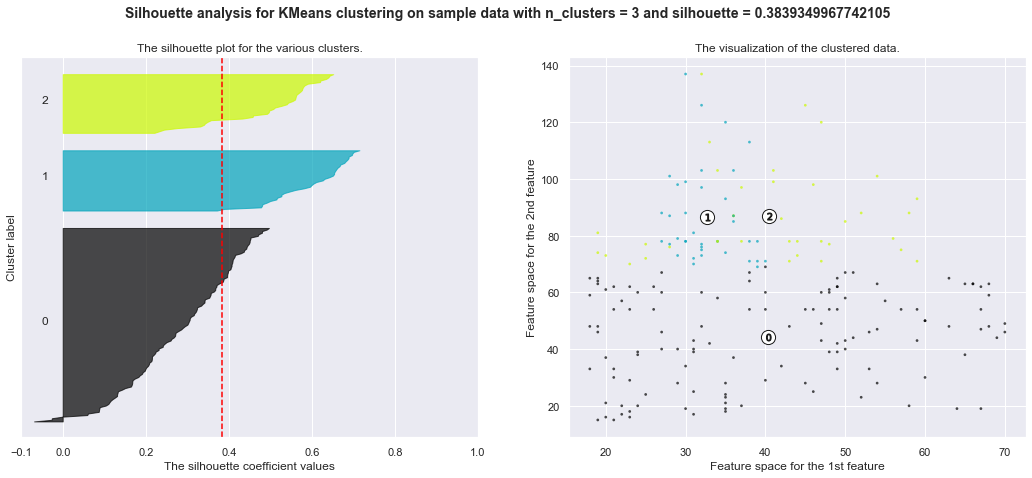

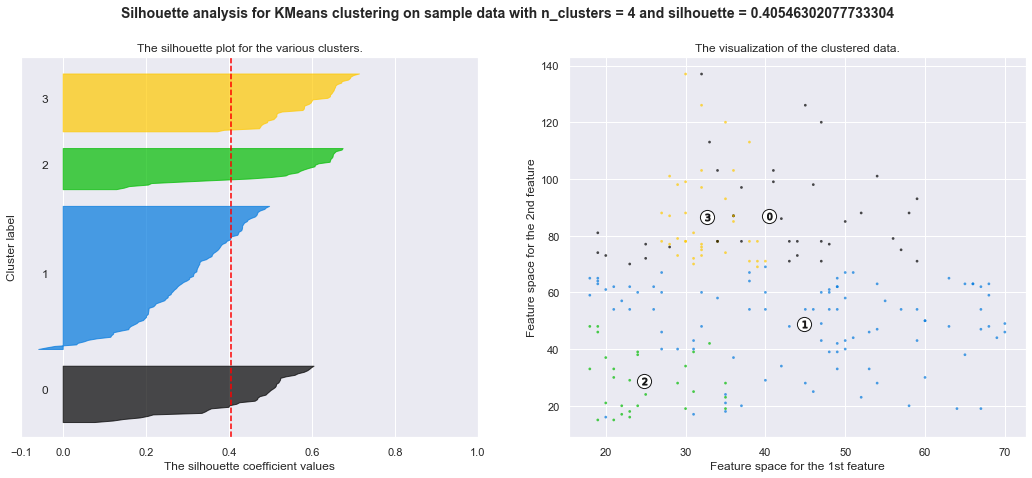

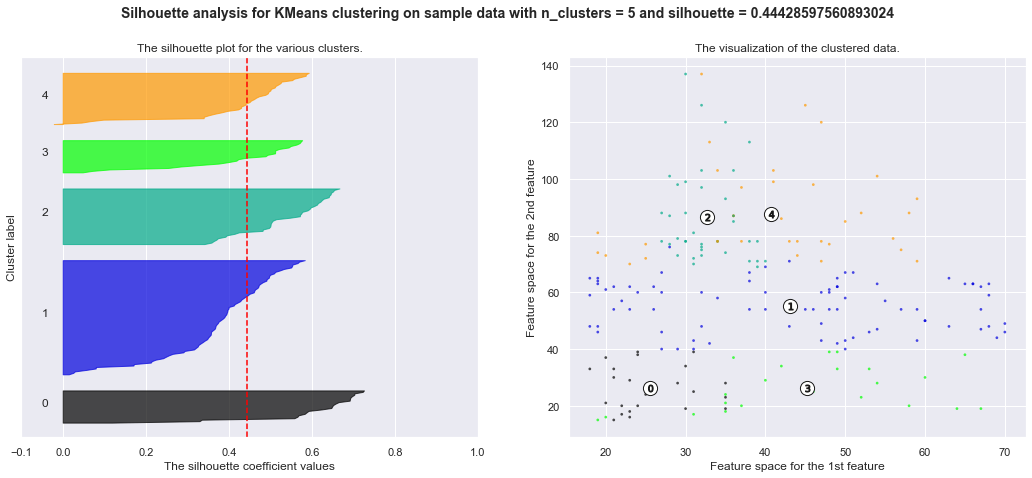

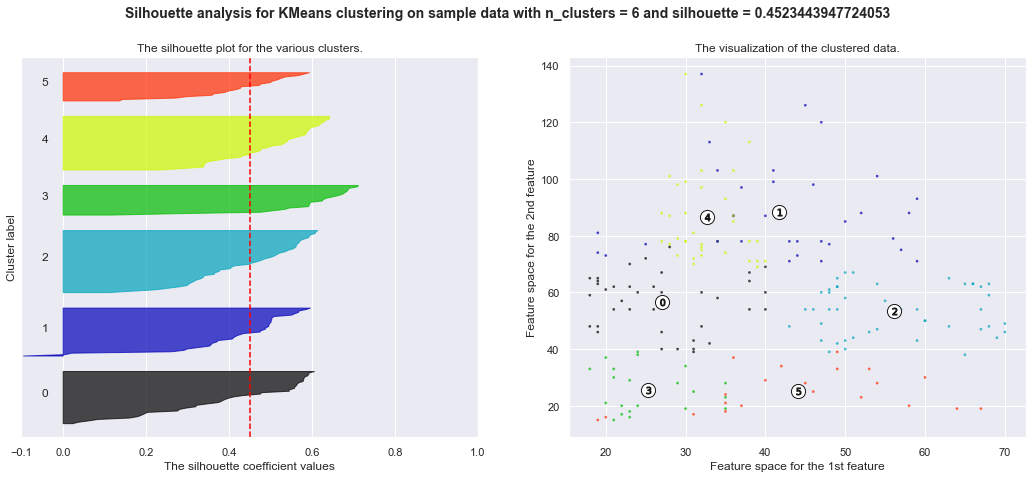

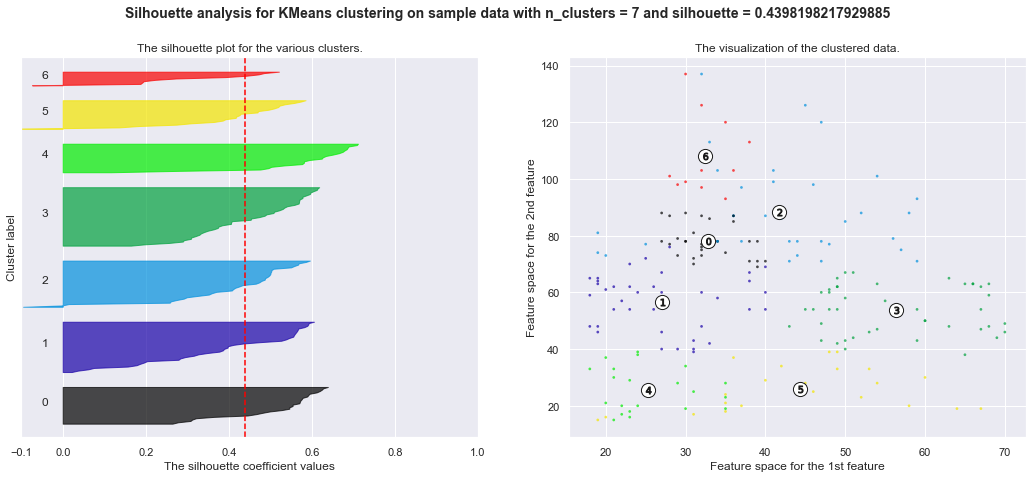

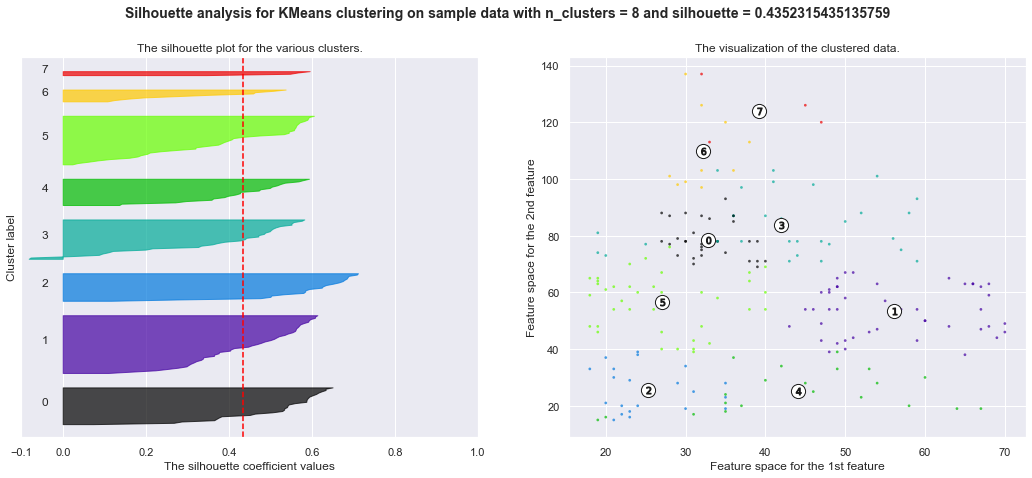

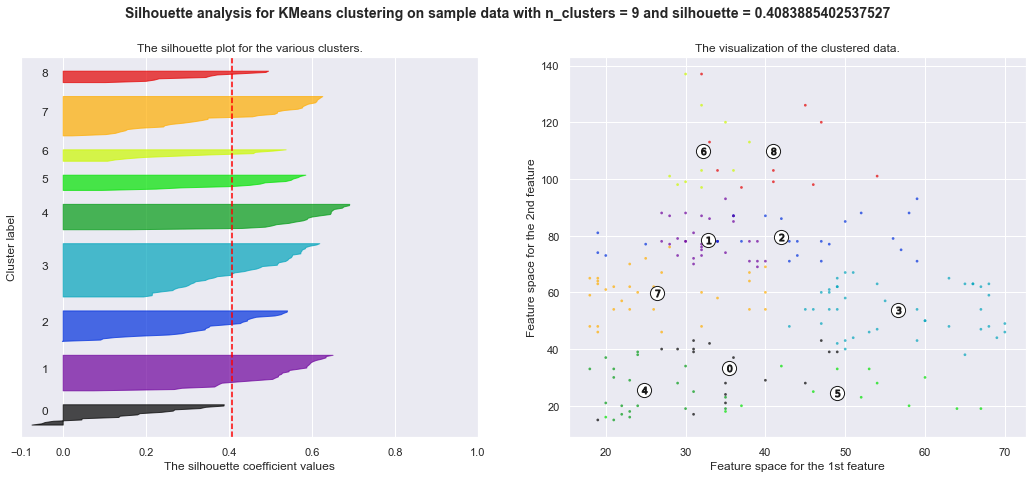

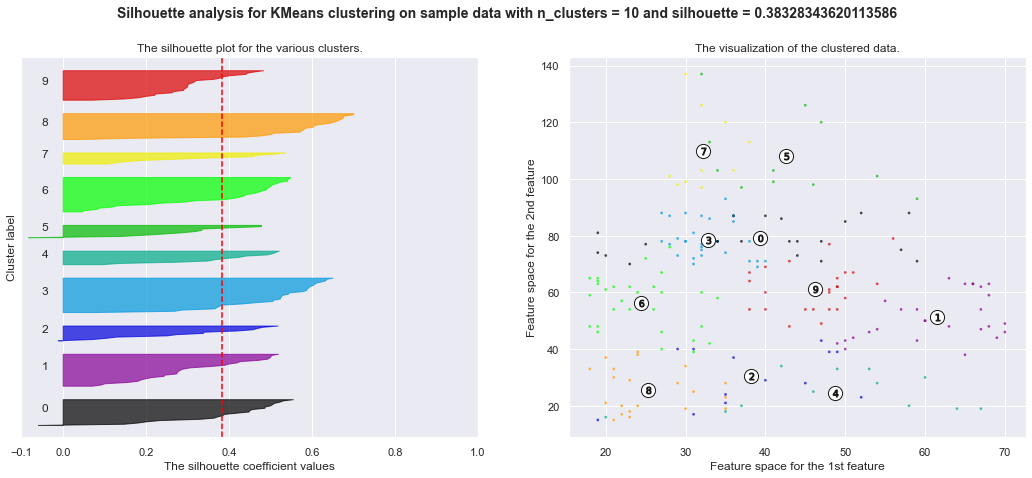

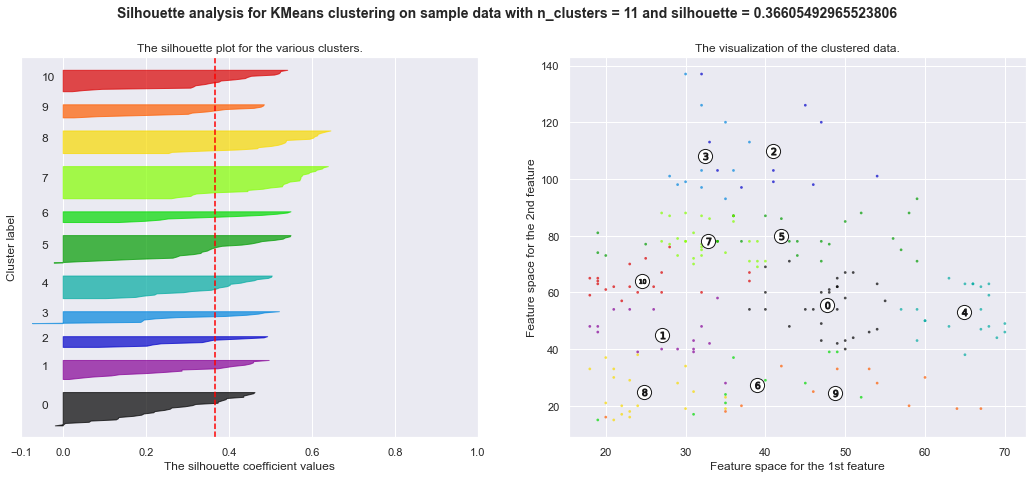

In [37]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

range_n_clusters = range(2,12)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters} and silhouette = {silhouette_avg}",
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [38]:
X = X.assign(cluster = clusters)
X.head()

Age  Annual Income (k$)  Spending Score (1-100)  cluster
0   19                  15                      39        0
1   21                  15                      81        4
2   20                  16                       6        0
3   23                  16                      77        4
4   31                  17                      40        0

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

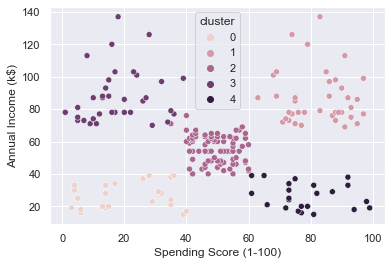

In [39]:
sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)",hue = 'cluster',  data=X)

In [40]:
import plotly.express as px

fig = px.scatter_3d(X, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
              color='cluster', opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

## **Finally, Successfully Segmented our Customers According to their Behaviors using Clustering Technique**